<a href="https://colab.research.google.com/github/nahidmaleki/Preprocessing/blob/main/01_Telco_Customer_Churn_Data_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "WA_Fn-UseC_-Telco-Customer-Churn.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "blastchar/telco-customer-churn",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

pd.set_option("display.max_columns", None)
print("First 5 records:", df.head())


/tmp/ipython-input-4216598740.py:10: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


Using Colab cache for faster access to the 'telco-customer-churn' dataset.
First 5 records:    customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechS

# ✅ Step 1: Exploratory Data Review (EDR)

In [ ]:
# Basic Structure
df.shape                            # Check rows, columns
df.info( )                          # Check dtypes + missing counts
df.describe()                       # Check numeric summary
df.describe(include="object")       # Check categorical summary

df.isnull().sum(axis=1)             # Count missing values per row
df.nunique()                        # Count unique values per column


,0
customerID,7043
gender,2
SeniorCitizen,2
Partner,2
Dependents,2
tenure,73
PhoneService,2
MultipleLines,3
InternetService,3
OnlineSecurity,3


In [ ]:
df.columns            # List all columns
df.sample(5)          # Preview random sample


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4743,6681-ZSEXG,Male,0,Yes,No,56,Yes,Yes,DSL,No,Yes,Yes,No,No,No,Two year,No,Credit card (automatic),59.5,3389.25,No
4328,1101-SSWAG,Female,0,Yes,No,15,Yes,Yes,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,51.1,711.15,No
5844,2905-KFQUV,Female,0,Yes,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),70.4,154.8,No
487,3649-JPUGY,Male,0,No,No,72,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),88.6,6201.95,No
6224,2330-PQGDQ,Male,0,Yes,Yes,51,Yes,Yes,Fiber optic,No,Yes,No,Yes,No,No,One year,No,Bank transfer (automatic),84.2,4299.75,No


# ✅ Step 2: Handling Missing Values

In [ ]:
import numpy as np

pd.Series([1.0, np.nan, 3.0])
pd.Series(["a", None, "c"])
pd.to_datetime(["2020-01-01", None, "2020-03-01"])
pd.Series([1, pd.NA, 3], dtype="Int64")     #nullable int
pd.Series([True, pd.NA, False], dtype="boolean")
s = pd.Series(["", "NA", "NULL", np.nan])
s.replace(["", "NA", "NULL"], np.nan, inplace=True)
# Check missing value
df.isnull().sum().sum()


/tmp/ipython-input-581411593.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  s.replace(["", "NA", "NULL"], np.nan, inplace=True)


np.int64(0)

In [ ]:
# For Telco: 'TotalCharges' often has blanks, convert to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Re_check missing
print(df['TotalCharges'].isnull().sum().sum())


11


In [ ]:
# Fill missing with median (numerical) or mode (categorical)
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())
print(df['TotalCharges'].isnull().sum().sum())


0


# ✅ Step 3: Correlation

In [ ]:
df.corr(numeric_only=True)


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.016567,0.220173,0.102652
tenure,0.016567,1.000000,0.247900,0.825464
MonthlyCharges,0.220173,0.247900,1.000000,0.650864
TotalCharges,0.102652,0.825464,0.650864,1.000000


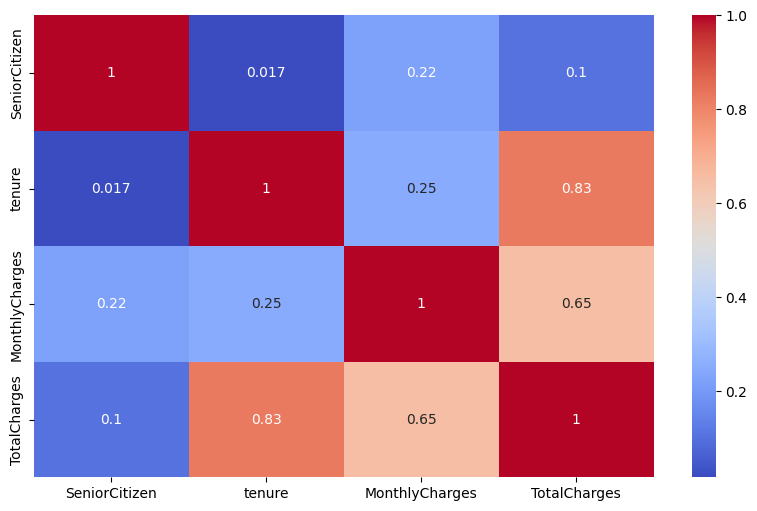

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Numeric only correlation
corr = df.corr(numeric_only=True)
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.show()


# ✅ Step 4: Encoding Categorical Variables
🔹 Label Encoding, Ordinal Encoding, One-hot Encoding (sklearn)


In [ ]:
# Drop ID column (not useful for ml)
if 'customerID' in df.columns:
  df.drop(columns=['customerID'], inplace=True)

# Separate categorical & numerical
cat_cols = df.select_dtypes(include="object").columns
num_cols = df.select_dtypes(exclude="object").columns
print("Categorical columns: ", cat_cols)
print("Numerical columns: ", num_cols)

Categorical columns:  Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')
Numerical columns:  Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')


In [ ]:
from sklearn.preprocessing import LabelEncoder

df_le = df.copy()     # Keep a separate version
label_encoders = {}

for col in cat_cols:
  le = LabelEncoder()
  df_le[col] = le.fit_transform(df_le[col])
  label_encoders = le       # Store encoder if needed later

df_le.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [ ]:
from sklearn.preprocessing import OrdinalEncoder

df_oe = df.copy()       # Keep a separate version
ordinal_encoders = {}

for col in cat_cols:
  oe = OrdinalEncoder()
  df_oe[col] = oe.fit_transform(df_oe[col].values.reshape(-1,1))
  ordinal_encoders[col] = oe      # Store encoder if needed later

df_oe.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0.0,0,1.0,0.0,1,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,29.85,0.0
1,1.0,0,0.0,0.0,34,1.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,1889.50,0.0
2,1.0,0,0.0,0.0,2,1.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,108.15,1.0
3,1.0,0,0.0,0.0,45,0.0,1.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,42.30,1840.75,0.0
4,0.0,0,0.0,0.0,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,151.65,1.0


In [ ]:
from sklearn.preprocessing import OneHotEncoder

df_ohe = df.copy()  # keep a separate version
label_encoders = {}

ohe = OneHotEncoder(drop="first", sparse_output=False) # Set sparse_output to False
encoded = ohe.fit_transform(df_ohe[cat_cols])

encoded_df = pd.DataFrame(encoded, columns=ohe.get_feature_names_out(cat_cols), index=df_ohe.index)
df_ohe = pd.concat([df_ohe.drop(columns=cat_cols), encoded_df], axis=1)

df_ohe.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,1,29.85,29.85,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0,34,56.95,1889.50,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0,2,53.85,108.15,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
3,0,45,42.30,1840.75,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,2,70.70,151.65,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


# ✅ Step 5: Feature Scaling

In [ ]:
df[num_cols]

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,0,2,53.85,108.15
3,0,45,42.30,1840.75
4,0,2,70.70,151.65
...,...,...,...,...
7038,0,24,84.80,1990.50
7039,0,72,103.20,7362.90
7040,0,11,29.60,346.45
7041,1,4,74.40,306.60


In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

df_ss = df.copy()
scaler = StandardScaler()
df_ss[num_cols] = scaler.fit_transform(df_ss[num_cols])

df_mm = df.copy()
mm = MinMaxScaler()
df_mm[num_cols] = mm.fit_transform(df_mm[num_cols])

df_rs = df.copy()
rs = RobustScaler()
df_rs[num_cols] = rs.fit_transform(df_rs[num_cols])


# ✅ Step 6: Outlier Handling

In [ ]:
# Example with Z-score
z_score = np.abs(df[num_cols]-df[num_cols].mean()/df[num_cols].std())
outliers = (z_score>3).all(axis=1)
print("Outlier detected: ", outliers.sum())

print(df.shape)
# Option: remove outliers
df = df[~outliers]
print(df.shape)

(7043, 20)
(7043, 20)


In [ ]:
# IQR method for outlier detection
Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1

outliers = ((df[num_cols] < (Q1 - 1.5 * IQR)) | (df[num_cols] > (Q3 + 1.5 * IQR))).any(axis=1)
print("Outliers detected:", outliers.sum())

print(df.shape)
# Option: remove outliers
df = df[~outliers]
print(df.shape)


(5901, 20)
(5901, 20)


/tmp/ipython-input-207355230.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[~outliers]


# ✅ Step 7: Skewness Handling (Log / Power Transform)

             Transform  Skewness  Kurtosis           JB-p
0             Original  1.045723 -0.038348  2.406109e-234
1                Log1p -0.703520 -0.357362  3.020220e-113
2                 Sqrt  0.376308 -0.995312   7.345566e-84
3      Box-Cox λ=0.237 -0.131500 -1.012167   4.062020e-59
4  Yeo–Johnson λ=0.235 -0.130360 -1.015393   2.105358e-59


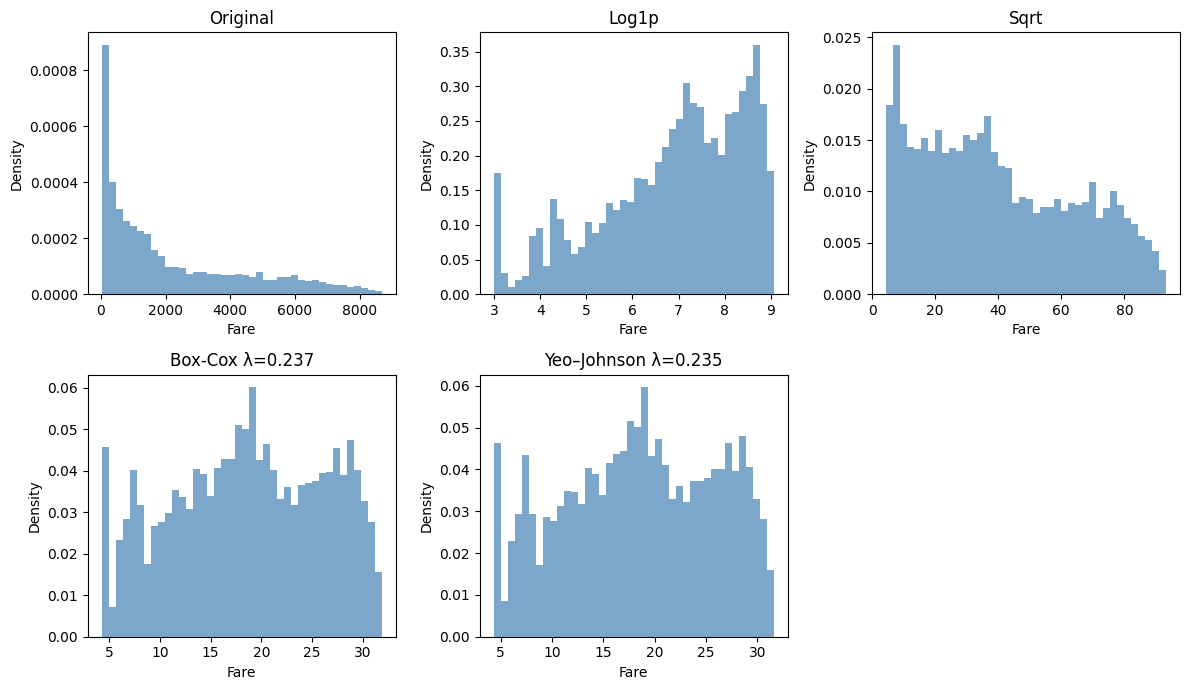

In [ ]:
from scipy.stats import skew, kurtosis, jarque_bera, boxcox
from sklearn.preprocessing import PowerTransformer
import matplotlib.pyplot as plt

x = df["TotalCharges"].astype(float)

# --- Metrics helper ---
def metrics(vec):
    sk = skew(vec, nan_policy='omit')
    ku = kurtosis(vec, fisher=True, nan_policy='omit')  # 0 = normal
    jb_stat, jb_p = jarque_bera(vec)
    return sk, ku, jb_p

# --- Transformations ---
x_log   = np.log1p(x)                        # log(1+x)
x_sqrt  = np.sqrt(x)                         # sqrt
x_bc, lam_bc = boxcox(x + 1e-6)              # Box-Cox needs >0
pt = PowerTransformer(method="yeo-johnson", standardize=False)
x_yj = pt.fit_transform(x.values.reshape(-1,1)).ravel()


# --- Report ---
rows = [
    ("Original", *metrics(x)),
    ("Log1p", *metrics(x_log)),
    ("Sqrt", *metrics(x_sqrt)),
    (f"Box-Cox λ={lam_bc:.3f}", *metrics(x_bc)),
    (f"Yeo–Johnson λ={pt.lambdas_[0]:.3f}", *metrics(x_yj))
]
report = pd.DataFrame(rows, columns=["Transform","Skewness","Kurtosis","JB-p"])

print(report)

# --- Plots (2×3 grid) ---
fig, axes = plt.subplots(2, 3, figsize=(12, 7))
titles = ["Original","Log1p","Sqrt",f"Box-Cox λ={lam_bc:.3f}",f"Yeo–Johnson λ={pt.lambdas_[0]:.3f}"]
data = [x, x_log, x_sqrt, x_bc, x_yj]

for ax, d, title in zip(axes.ravel(), data, titles):
    ax.hist(d, bins=40, density=True, color="steelblue", alpha=0.7)
    ax.set_title(title)
    ax.set_xlabel("Fare"); ax.set_ylabel("Density")

fig.delaxes(axes[1,2])  # remove empty subplot
fig.tight_layout()
plt.show()